In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

                        osm_id  link_dir  speed_kmph n_time  hours  mins  \
date_time                                                                  
2018-01-01 00:00:00  197107696         1          35  00:00      0     0   
2018-01-01 00:00:00   13769164         1          25  00:00      0     0   
2018-01-03 14:45:00   13769164         1          21  14:45     14    45   
2018-01-01 00:00:00  174019380         1          31  00:00      0     0   
2018-01-01 00:00:00  176665188         1          26  00:00      0     0   

                         n_day  stores    n_month  highway  road_lt_m bus_stop  
date_time                                                                       
2018-01-01 00:00:00  MONDAY     CLOSED  JANUARY        NaN        NaN      NaN  
2018-01-01 00:00:00  MONDAY     CLOSED  JANUARY    primary       72.0       no  
2018-01-03 14:45:00  WEDNESDAY    OPEN  JANUARY    primary       72.0       no  
2018-01-01 00:00:00  MONDAY     CLOSED  JANUARY    primary    

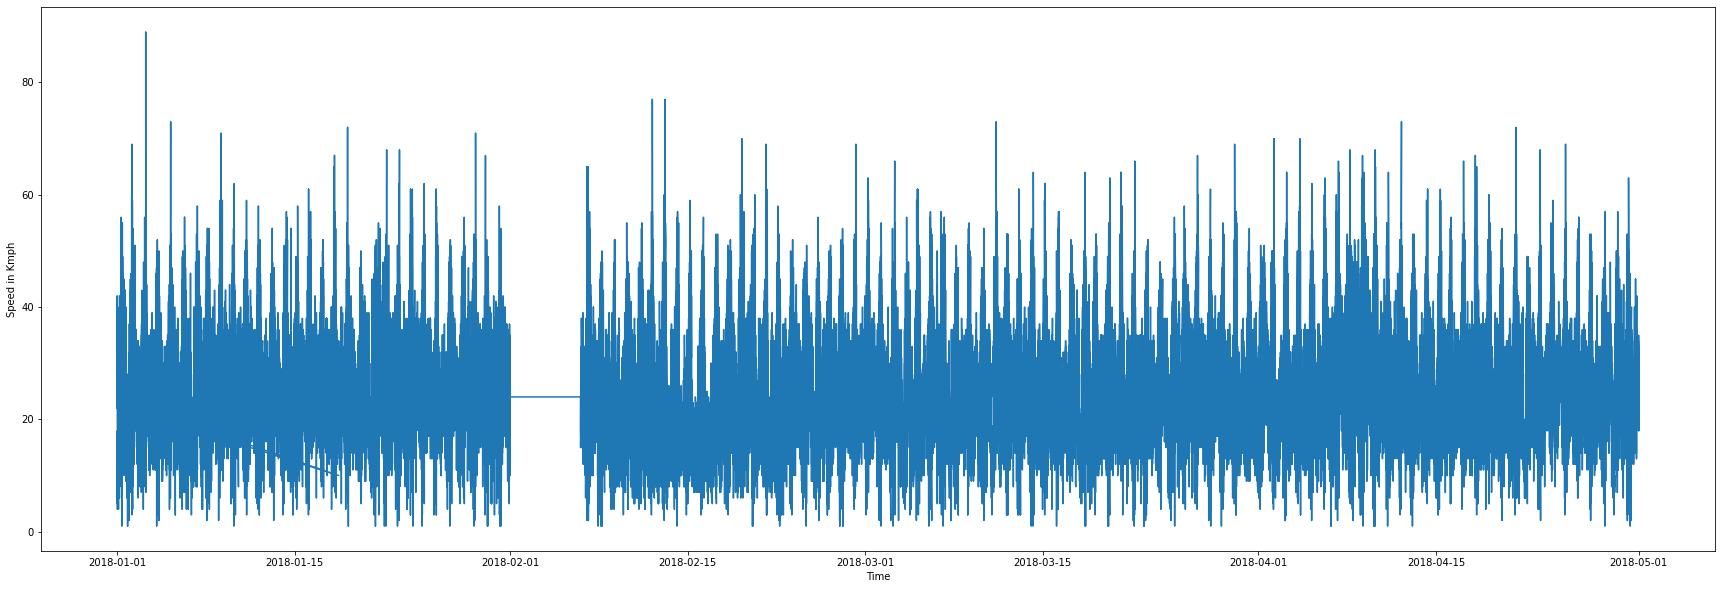

In [15]:
df = pd.read_csv('data-1649678101298.csv', parse_dates = ['date_time'], index_col = ['date_time'])
print(df.head())

y = df.speed_kmph

plt.figure(figsize=(30,10))
plt.xlabel('Time')
plt.ylabel('Speed in Kmph')
plt.plot(y)



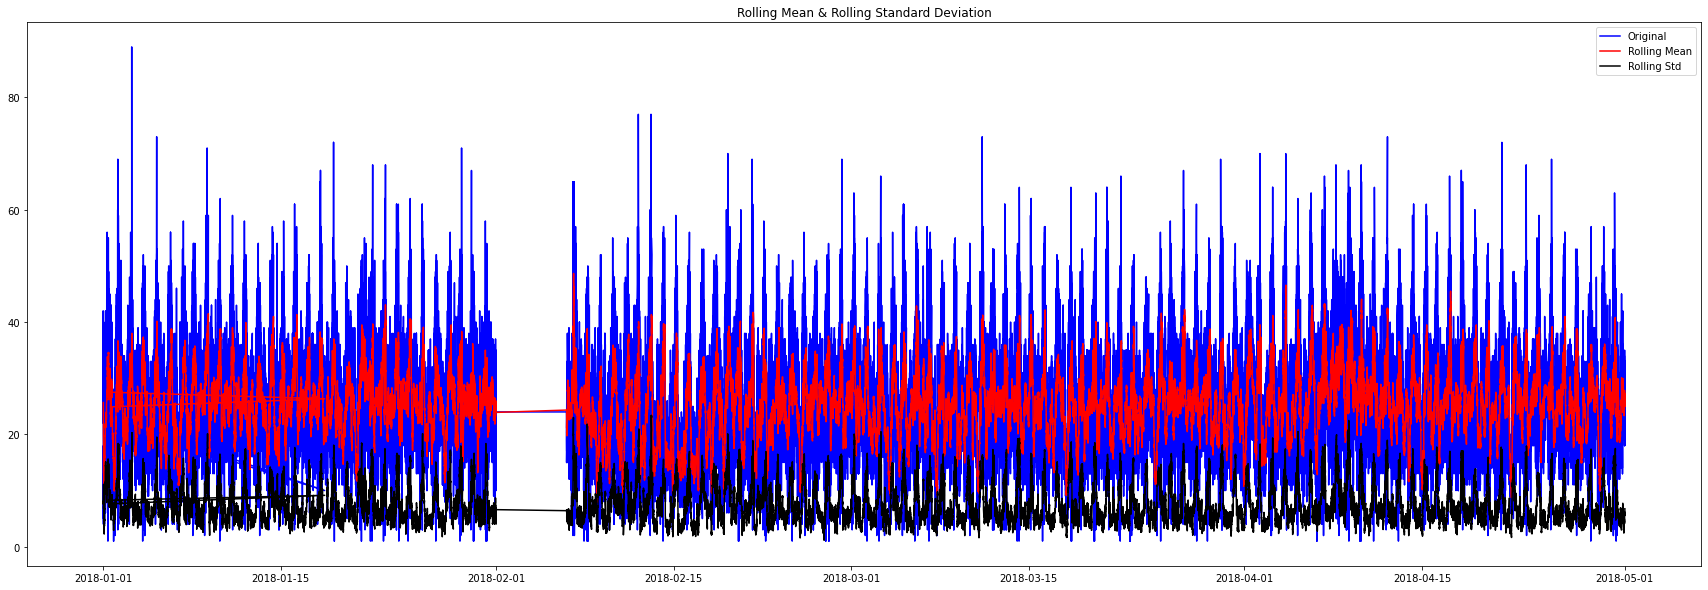

In [17]:
rolling_mean = y.rolling(window = 12).mean()
rolling_std = y.rolling(window = 12).std()
plt.figure(figsize=(30,10))
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [18]:
result = adfuller(df['speed_kmph'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -18.890741879150255
p-value: 0.0
Critical Values:
	1%: -3.430503326774848
	5%: -2.8616077670282873
	10%: -2.566806070192689


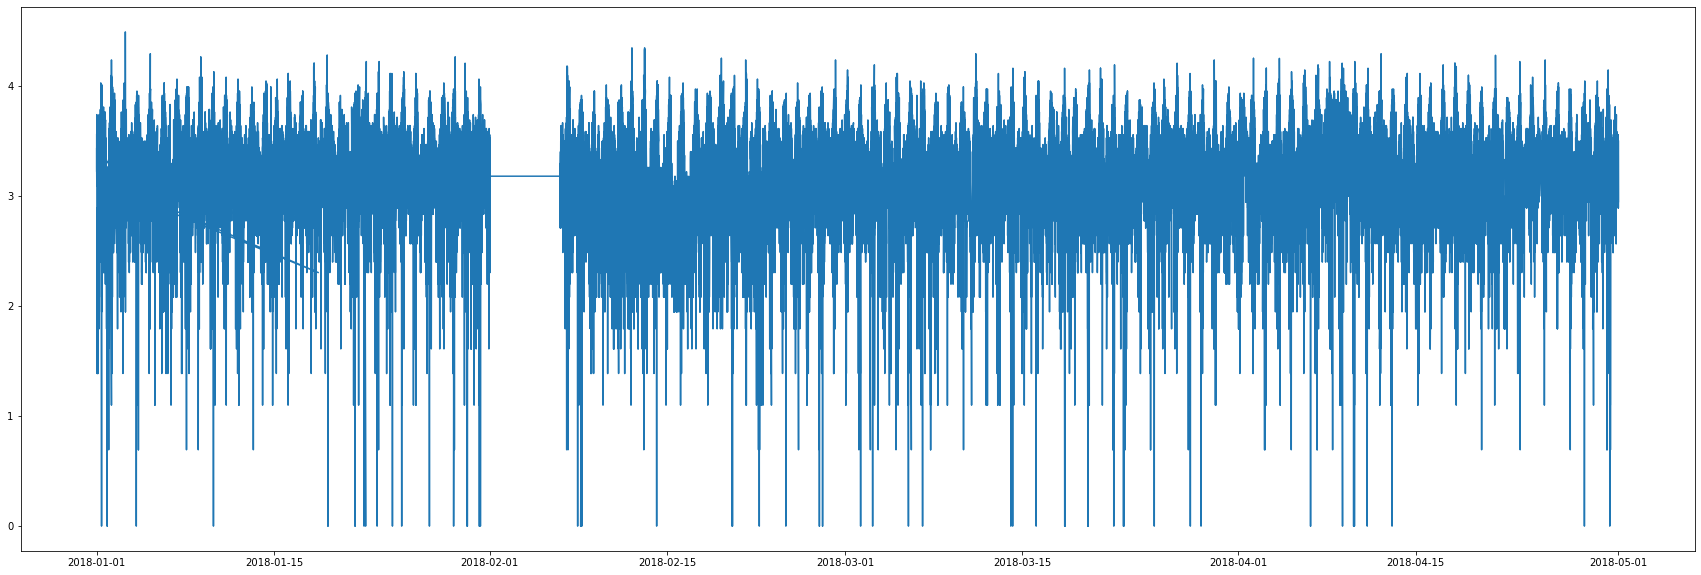

In [20]:
df_log = np.log(y)
plt.figure(figsize=(30,10))
plt.plot(df_log)